In [ ]:
!pip install --upgrade scikit-learn
# !pip install pandas-profiling==3.4.0
!pip install tensorflow
!pip install keras
!pip install livelossplot
!pip install -q -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 3.5 MB/s eta 0:00:00


# Libraries

In [ ]:
# please install holidays and verstack before running this notebook :)
from pandas_profiling import ProfileReport
import decimal
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval
from imblearn.over_sampling import SMOTE

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

from sklearn import datasets
from matplotlib import offsetbox

import pandas_profiling
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly

from sklearn.linear_model import Ridge
from sklearn.linear_model import PoissonRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn import set_config
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import keras_tuner as kt
tf.random.set_seed(42)

import torch
import torch.nn as nn

import os
import matplotlib.pyplot as plt
import numpy as np
import logging
from pathlib import Path
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import warnings
import random

seed = 42

from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline

# Regression task

## 1.Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW11/data/AirQualityUCI.csv"
data_reg = pd.read_csv(path, sep=";")
data_reg.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


The last 2 column have no data they are the result of the way data was written in the csv.

In [ ]:
if "Unnamed: 15" in data_reg.columns:
  data_reg = data_reg.drop(["Unnamed: 15"], axis=1)
if "Unnamed: 16" in data_reg.columns:
  data_reg = data_reg.drop(["Unnamed: 16"], axis=1)

We can see that we have NaN only rows at the end of the dataset, I will drop that parts as well.

In [ ]:
data_reg = data_reg.dropna(how="all")

### 1.1 Data Preparation and Cleaning

Check the types of the columns.

In [ ]:
print(data_reg.shape)
print(data_reg.dtypes.value_counts())
print(data_reg.dtypes)

(9357, 15)
float64    8
object     7
dtype: int64
Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object


We can see that some of the continuous variables are in obejct format. We need to change their format to float64 to be able to work with them.

In [ ]:
object_to_float_features = list(data_reg.select_dtypes(object).columns)
object_to_float_features.remove("Date")
object_to_float_features.remove("Time")

In [ ]:
for column in object_to_float_features:
  data_reg[column] = data_reg[column].str.replace(',', '.', regex=False)
  data_reg[column] = pd.to_numeric(data_reg[column])

In [ ]:
print(data_reg.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


As mention in the data documentation all the values -200 are null values, so I will replace them with NaN.

In [ ]:
continious_features = list(data_reg.select_dtypes('number').columns)
print(continious_features)

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [ ]:
data_reg[continious_features] = data_reg[continious_features].replace(-200, np.NaN)

In [ ]:
print(data_reg.isnull().sum())

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


Seems that 336 rows have no data, except Date and Time. I will delete the rows that have C6H6(GT) NaN as they have no values and check the number of null values again.

In [ ]:
data_reg = data_reg.dropna(subset=["C6H6(GT)"])
print(data_reg.isnull().sum())

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64


Reset the indexes after deletion of some rows.

In [ ]:
data_reg.reset_index(inplace=True, drop=True)

In [ ]:
total = data_reg.isnull().sum().sort_values(ascending=False)
percent = (data_reg.isnull().sum() / data_reg.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

               Total   Percent
NMHC(GT)        8104  0.901346
CO(GT)          1647  0.183183
NO2(GT)         1598  0.177733
NOx(GT)         1595  0.177400
Date               0  0.000000
Time               0  0.000000
PT08.S1(CO)        0  0.000000
C6H6(GT)           0  0.000000
PT08.S2(NMHC)      0  0.000000
PT08.S3(NOx)       0  0.000000
PT08.S4(NO2)       0  0.000000
PT08.S5(O3)        0  0.000000
T                  0  0.000000
RH                 0  0.000000
AH                 0  0.000000


I will fully drop the column NMHC(GT) as more than 90% of the data is missing. Later will do the split of data to train and test and impute the missing data in the columns CO(GT), NO2(GT) and NOx(GT). I will use multiple imputation as more than 15% of the data is missing in those columns.

In [ ]:
if "NMHC(GT)" in data_reg.columns:
  data_reg = data_reg.drop(["NMHC(GT)"], axis=1)

Turn date columns to cyclic sine function using only the day of the year data, it will represent the time of the year, probbably may capture weather changes. Also from the same column will extract day of the week which may represent some cycles over the week. Will do the same with time of the day as it may capture some info on the day level cycles.

In [ ]:
# change the "Date" column type from object to datetime
data_reg["Date"] = pd.to_datetime(data_reg["Date"])

def day_of_year(x):
  return x.timetuple().tm_yday
def day_of_week(x):
  k = x.timetuple().tm_yday
  return k%7
def hour_of_day(s):
  return int(s[0:2])

data_reg["DayYear"] = data_reg["Date"].apply(day_of_year)
data_reg["DayWeek"] = data_reg["Date"].apply(day_of_week)
data_reg["Hour"] = data_reg["Time"].apply(hour_of_day)

In [ ]:
print(data_reg[["DayYear", "DayWeek", "Hour"]])
data_reg.dtypes

      DayYear  DayWeek  Hour
0         277        4    18
1         277        4    19
2         277        4    20
3         277        4    21
4         277        4    22
...       ...      ...   ...
8986       94        3    10
8987       94        3    11
8988       94        3    12
8989       94        3    13
8990       94        3    14

[8991 rows x 3 columns]


Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DayYear                   int64
DayWeek                   int64
Hour                      int64
dtype: object

Change the int values of the newly added date and time columns to sine which will capchur the cycles and also bring the values to (-1, 1) range.

In [ ]:
def sin_day_year(x):
	return np.sin((x / 365) * 2 * np.pi)
def sin_day_week(x):
	return np.sin((x / 7) * 2 * np.pi)
def sin_hour(x):
	decimal.getcontext().prec = 6
	tmp = decimal.getcontext().create_decimal(1.357e-05)
	return round((np.sin((x / 24) * 2 * np.pi)), 6)

In [ ]:
data_reg["day_year_sin"] = data_reg["DayYear"].apply(sin_day_year)
data_reg["day_week_sin"] = data_reg["DayWeek"].apply(sin_day_week)
data_reg["hour_sin"] = data_reg["Hour"].apply(sin_hour)
print(data_reg[["day_year_sin", "day_week_sin", "hour_sin"]])

      day_year_sin  day_week_sin  hour_sin
0        -0.998435     -0.433884 -1.000000
1        -0.998435     -0.433884 -0.965926
2        -0.998435     -0.433884 -0.866025
3        -0.998435     -0.433884 -0.707107
4        -0.998435     -0.433884 -0.500000
...            ...           ...       ...
8986      0.998880      0.433884  0.500000
8987      0.998880      0.433884  0.258819
8988      0.998880      0.433884  0.000000
8989      0.998880      0.433884 -0.258819
8990      0.998880      0.433884 -0.500000

[8991 rows x 3 columns]


In [ ]:
# if you want to drop date and time columns overall use the "all_to_drop"
optional_to_drop = ["day_sin", "hour_sin"]
cols_to_drop = ["Date", "Time", "DayYear", "DayWeek", "Hour"]
all_to_drop = optional_to_drop + cols_to_drop
for col in cols_to_drop:
  if col in data_reg.columns:
    data_reg = data_reg.drop([col], axis=1)

In [ ]:
print(data_reg.dtypes)

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
day_year_sin     float64
day_week_sin     float64
hour_sin         float64
dtype: object


### 1.2 Separation of Test from the Dataset

I will split the data to training and test. I will consecuently do EDA on the training part of the data to make sure that the test data was not used in the decision making of the choice and construction of the predictive model.

In [ ]:
int(data_reg.shape[0]*0.25)

2247

In [ ]:
test_size = round((data_reg.shape[0]*0.25))

y = data_reg["C6H6(GT)"]
X = data_reg.drop(["C6H6(GT)"], axis=1)

X_train_all, X_test, y_train_all, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]

Here I used the scsplit to use the stratification by a continuous variable, our target variable in this case.

In [ ]:
print(y_train_all.describe())
print(y_test.describe())

count    6743.000000
mean       10.739315
std         7.631341
min         0.200000
25%         5.100000
50%         8.900000
75%        14.600000
max        63.700000
Name: C6H6(GT), dtype: float64
count    2248.000000
mean        8.114769
std         6.491714
min         0.100000
25%         3.300000
50%         6.100000
75%        11.400000
max        43.000000
Name: C6H6(GT), dtype: float64


We can observe how similar the two distributions are.

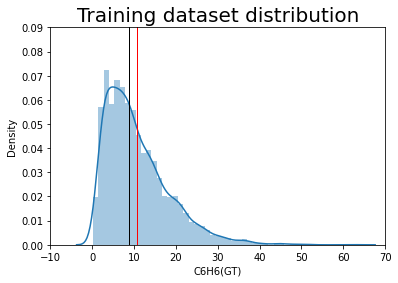

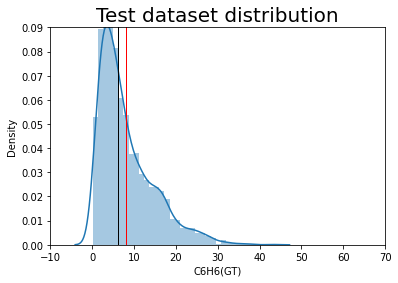

In [ ]:
fig, ax = plt.subplots()
sns.distplot(y_train_all, ax=ax)
plt.axvline(y_train_all.mean(), linewidth=1 , color = 'red')
plt.axvline(y_train_all.median(), linewidth=1 , color = 'black')
ax.set_xlim(-10,70)
ax.set_ylim(0,0.09)
plt.title(label="Training dataset distribution",
          fontsize=20,
          color="black")
plt.show();
fig, ax = plt.subplots()
sns.distplot(y_test, ax=ax)
plt.axvline(y_test.mean(), linewidth=1 , color = 'red')
plt.axvline(y_test.median(), linewidth=1 , color = 'black')
ax.set_xlim(-10,70)
ax.set_ylim(0,0.09)
plt.title(label="Test dataset distribution",
          fontsize=20,
          color="black")
plt.show()

### 1.3 Delete the Outliers

I will drop the outliers of the training dataset.

In [ ]:
# training dataframe with target variable
df_train = pd.concat([X_train_all, y_train_all], axis=1)

I wrote a function to help understand the right interval for letting out the outliers. The idea is to modify the multiplier of IQR such that we delete less than specific amout of data from our dataset. You pass to the function the range and the stepsize for the search of the multiplier and give the percentage less than which you are ready to delete the outliers. The function returns the multiplier k that is the lowest for that cause. Then you run the remove_outlier_dataframe function with that k and save the result.

In [ ]:
def remove_outlier(df_in, col_name, k):
    df = df_in.copy()
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-k*iqr
    fence_high = q3+k*iqr
    # print(fence_low)
    df_null = df[df[col_name].isnull()]
    # print(df_null.shape)
    df = df[df[col_name] > fence_low]
    df = df[df[col_name] < fence_high]
    df = pd.concat([df_null, df])
    return df

def remove_outlier_dataframe(df_in, k):
  Current_df = df_in.copy()
  for col in list(data_reg.select_dtypes('number').columns):
    Current_df = remove_outlier(Current_df, col, k)
  return Current_df

def optimal_range(df_in, a, b, step=0.01, percentage=0.01):
  for i in np.arange(a, b, step):
    df_out = remove_outlier_dataframe(df_in, i)
    # print(1 - (df_out.shape[0]/df_in.shape[0]))
    if 1 - (df_out.shape[0]/df_in.shape[0]) < percentage:
      return i
  return "Not in this range"

opt_k = optimal_range(df_train, 1, 10, step=0.2)
print(opt_k)

3.5999999999999996


In [ ]:
print(df_train.shape)
df_train = remove_outlier_dataframe(df_train, opt_k)
print(df_train.shape)

(6743, 15)
(6680, 15)


In [ ]:
df_train.reset_index(inplace=True, drop=True)

In [ ]:
y_train_all = df_train["C6H6(GT)"]
X_train_all = df_train.drop(["C6H6(GT)"], axis=1)

## 2.EDA

In [ ]:
descriptive_stats = df_train.describe(include='all')
print(descriptive_stats)

            CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  5227.000000  6680.000000    6680.000000  5251.000000   6680.000000   
mean      2.131758  1094.644760     959.931587   205.068368    856.726796   
std       1.381620   215.085259     259.387166   177.405863    252.650710   
min       0.100000   647.000000     397.000000     2.000000    330.000000   
25%       1.100000   933.000000     765.000000    81.000000    683.000000   
50%       1.800000  1061.000000     934.000000   147.000000    823.000000   
75%       2.900000  1227.000000    1129.000000   271.000000    989.000000   
max       9.200000  2040.000000    1935.000000   968.000000   2095.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T           RH  \
count  5248.000000   6680.000000  6680.000000  6680.000000  6680.000000   
mean    100.117569   1558.638623  1009.113174    21.149057    47.969910   
std      40.314375    300.933773   373.519774     7.950065    17.420397   
min   

Find the features highly correlated with the dependent variable.

CO(GT)           0.940705
PT08.S1(CO)      0.887974
PT08.S2(NMHC)    0.984140
NOx(GT)          0.713940
PT08.S3(NOx)    -0.771716
NO2(GT)          0.739418
PT08.S4(NO2)     0.810553
PT08.S5(O3)      0.881656
T                0.151410
RH              -0.083487
AH               0.101635
day_year_sin     0.005680
day_week_sin     0.052690
hour_sin        -0.306900
C6H6(GT)         1.000000
Name: C6H6(GT), dtype: float64


<Axes: >

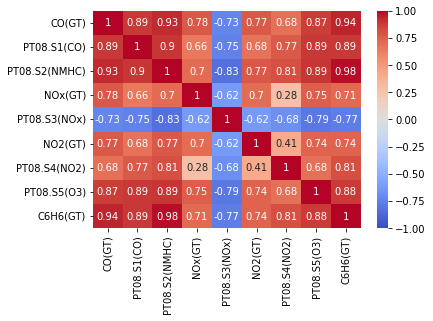

In [ ]:
corr = df_train.corr()
print(corr["C6H6(GT)"])
condition = np.abs(corr["C6H6(GT)"]) > 0.5
top_corr = corr.loc[condition, condition]
sns.heatmap(top_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

I will drop these columns because of very low correlation with the target variable.

In [ ]:
if "RH" in X_train_all.columns:
  X_train_all = X_train_all.drop(["RH"], axis=1)
  X_test = X_test.drop(["RH"], axis=1)
if "day_year_sin" in X_train_all.columns:
  X_train_all = X_train_all.drop(["day_year_sin"], axis=1)
  X_test = X_test.drop(["day_year_sin"], axis=1)
if "day_week_sin" in X_train_all.columns:
  X_train_all = X_train_all.drop(["day_week_sin"], axis=1)
  X_test = X_test.drop(["day_week_sin"], axis=1)

### 2.1 Visualization

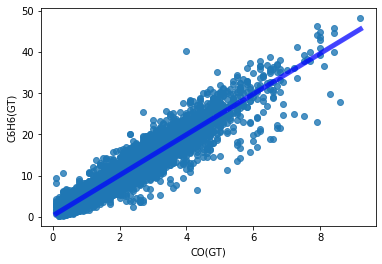

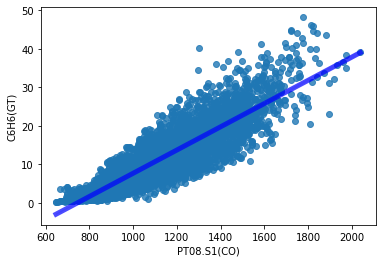

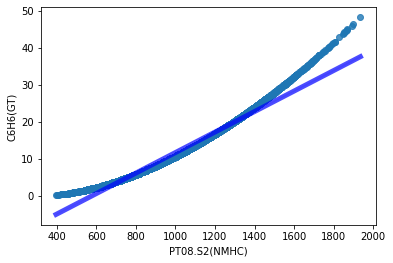

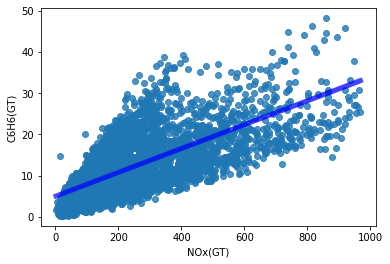

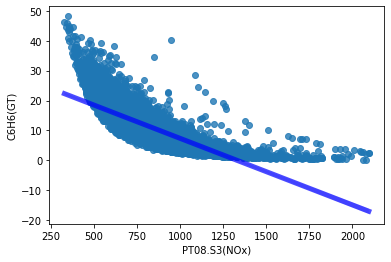

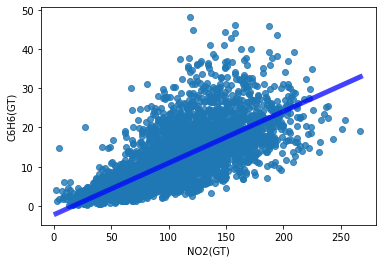

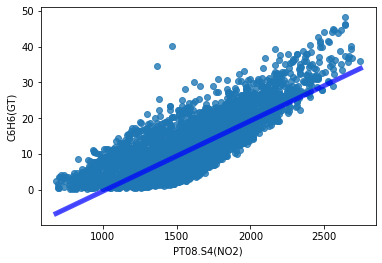

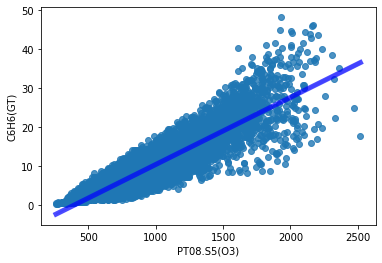

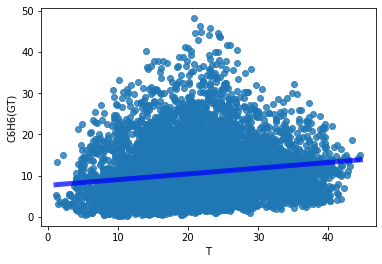

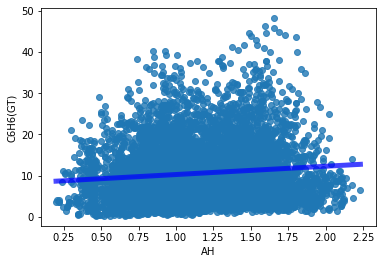

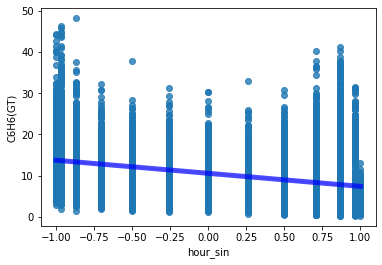

In [ ]:
# plots
for col in X_train_all.columns:
  sns.regplot(x=X_train_all[col], y=y_train_all, line_kws={"color":"b","alpha":0.7,"lw":5})
  plt.show()

We can see that some of the variables are connected to the target variable linearly. At the same time the realtionships of PT08.S1(CO), PT08.S2(NMHC) and PT08.S3(NOx) can be better described by a polynomial function. Thus we will try polinomial regression as well.

In [ ]:
X_train_all

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,hour_sin
0,NaN,1545.0,1353.0,NaN,767.0,NaN,2058.0,1588.0,9.2,0.6561,0.707107
1,NaN,1418.0,1023.0,NaN,785.0,NaN,1720.0,1410.0,19.7,0.9837,0.500000
2,NaN,1410.0,1030.0,NaN,781.0,NaN,1743.0,1372.0,20.7,1.0092,0.258819
3,NaN,1438.0,1096.0,NaN,781.0,NaN,1779.0,1266.0,23.3,1.0098,0.000000
4,NaN,1278.0,1000.0,NaN,866.0,NaN,1621.0,1014.0,23.8,0.8897,-0.258819
...,...,...,...,...,...,...,...,...,...,...,...
6675,4.2,1469.0,1086.0,514.0,564.0,125.0,1485.0,1394.0,11.0,1.0727,-0.258819
6676,2.6,1271.0,886.0,345.0,688.0,121.0,1321.0,1113.0,11.7,1.0964,0.000000
6677,1.6,1161.0,810.0,231.0,775.0,117.0,1281.0,958.0,11.6,1.0924,0.258819
6678,1.3,1053.0,680.0,166.0,890.0,108.0,1166.0,807.0,11.3,1.0741,0.500000


## 3.Imputation and Normalization

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all,
#                                                   random_state=seed, shuffle=True, test_size = 0.2)
# X_train_all.reset_index(inplace=True, drop=True)
# y_train_all.reset_index(inplace=True, drop=True)

In [ ]:
CONTINUOUS = X_train_all.select_dtypes(include=['float']).columns.tolist()
CYCLICAL = ["hour_sin"] #["day_sin", "hour_sin"]
for cyc in CYCLICAL:
  if cyc in CONTINUOUS:
    CONTINUOUS.remove(cyc)
print(CONTINUOUS, CYCLICAL)

['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'] ['hour_sin']


Here I will use IterativeImputer for imputation as there was high amount of data missing more than 15% noted earlier. So imputing with the help of the other column will be more accurate.

In [ ]:
imp_mean = IterativeImputer(random_state=seed)
X_train_all = pd.DataFrame(imp_mean.fit_transform(X_train_all), columns = X_train_all.columns)
X_test = pd.DataFrame(imp_mean.transform(X_test), columns = X_train_all.columns)

In [ ]:
continuous_def = gen_features(
    columns=[[c] for c in CONTINUOUS],
    classes=[
        # {'class': IterativeImputer, 'max_iter': 10},
        {'class': StandardScaler}
    ]
)
cyclical_def = gen_features(
    columns=[[c] for c in CYCLICAL],
    classes=[
        # {'class': SimpleImputer, 'strategy': 'median'},
        {'class': StandardScaler}
    ]
)

In [ ]:
features = continuous_def + cyclical_def
mapper = DataFrameMapper(features)
len(features)

11

In [ ]:
X_train_tr = pd.DataFrame(mapper.fit_transform(X_train_all))
X_test_tr = pd.DataFrame(mapper.transform(X_test))

# scaler = StandardScaler()
# scaler.fit(np.array(y_train).reshape(-1, 1))
# y_train_tr = scaler.transform(np.array(y_train).reshape(-1, 1))
# y_val_tr = scaler.transform(np.array(y_val).reshape(-1, 1))

## 4.Basic Linear Regression

In [ ]:
def print_reg_metrics(true_values_train, predicted_values_train, featurecount=1, cval=1):
    n = len(true_values_train)/cval
    r2 = metrics.r2_score(true_values_train, predicted_values_train)
    r2_adj = 1-(1-r2)*(n-1)/(n-featurecount)
    mae = metrics.mean_absolute_error(true_values_train, predicted_values_train)
    mse = metrics.mean_squared_error(true_values_train, predicted_values_train)
    rmse = np.sqrt(metrics.mean_squared_error(true_values_train, predicted_values_train))
    print(
        f"R2 score: {r2}",
        f"\nR2 Adjusted: {r2_adj}",
        f"\nRMS Error: {rmse}",
        f"\nMS Error: {mse}",
        f"\nMA Error: {mae}"
          )

In [ ]:
def regression_cross_val_score(X_cval, y_cval, regressor = LinearRegression()):
    # Variables for average classification report
    originalclass_lr = []
    predictedclass_lr = []

    #Make our custom score
    def classification_report_with_r2_score(y_true, y_pred):
        originalclass_lr.extend(y_true)
        predictedclass_lr.extend(y_pred)
        return r2_score(y_true, y_pred) # return accuracy score

    outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

    # Nested CV with parameter optimization
    nested_score = cross_val_score(regressor, X=X_cval, y=y_cval, cv=outer_cv, scoring=make_scorer(classification_report_with_r2_score))

    # Average values in classification report for all folds in a K-fold Cross-validation
    print_reg_metrics(originalclass_lr, predictedclass_lr, X_cval.shape[1], cval=10)

In [ ]:
lin_reg = LinearRegression()
regression_cross_val_score(X_train_tr, y_train_all, lin_reg)

R2 score: 0.9844923363549661 
R2 Adjusted: 0.9842562988565637 
RMS Error: 0.9088535588493123 
MS Error: 0.8260147914330603 
MA Error: 0.6456995998967037


## 5.Polynomial Regression

### 5.1 Feature Engineering

In [ ]:
poly = PolynomialFeatures(2)
# X_train_poly = poly.fit_transform(X_train)
# X_val_poly = poly.transform(X_val)
X_train_all_poly = poly.fit_transform(X_train_all)
X_test_poly = poly.transform(X_test)
poly_columns = poly.get_feature_names_out(X_train_all.columns)
# X_train_poly = pd.DataFrame(X_train_poly, columns=poly_columns)
# X_val_poly = pd.DataFrame(X_val_poly, columns=poly_columns)
X_train_all_poly = pd.DataFrame(X_train_all_poly, columns=poly_columns)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_columns)

In [ ]:
CONTINUOUS = poly.get_feature_names_out(X_train_all.columns)
print(list(CONTINUOUS))

['1', 'CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'hour_sin', 'CO(GT)^2', 'CO(GT) PT08.S1(CO)', 'CO(GT) PT08.S2(NMHC)', 'CO(GT) NOx(GT)', 'CO(GT) PT08.S3(NOx)', 'CO(GT) NO2(GT)', 'CO(GT) PT08.S4(NO2)', 'CO(GT) PT08.S5(O3)', 'CO(GT) T', 'CO(GT) AH', 'CO(GT) hour_sin', 'PT08.S1(CO)^2', 'PT08.S1(CO) PT08.S2(NMHC)', 'PT08.S1(CO) NOx(GT)', 'PT08.S1(CO) PT08.S3(NOx)', 'PT08.S1(CO) NO2(GT)', 'PT08.S1(CO) PT08.S4(NO2)', 'PT08.S1(CO) PT08.S5(O3)', 'PT08.S1(CO) T', 'PT08.S1(CO) AH', 'PT08.S1(CO) hour_sin', 'PT08.S2(NMHC)^2', 'PT08.S2(NMHC) NOx(GT)', 'PT08.S2(NMHC) PT08.S3(NOx)', 'PT08.S2(NMHC) NO2(GT)', 'PT08.S2(NMHC) PT08.S4(NO2)', 'PT08.S2(NMHC) PT08.S5(O3)', 'PT08.S2(NMHC) T', 'PT08.S2(NMHC) AH', 'PT08.S2(NMHC) hour_sin', 'NOx(GT)^2', 'NOx(GT) PT08.S3(NOx)', 'NOx(GT) NO2(GT)', 'NOx(GT) PT08.S4(NO2)', 'NOx(GT) PT08.S5(O3)', 'NOx(GT) T', 'NOx(GT) AH', 'NOx(GT) hour_sin', 'PT08.S3(NOx)^2', 'PT08.S3(NOx) NO2(GT)', 'PT08

In [ ]:
continuous_poly_def = gen_features(
    columns=[[c] for c in CONTINUOUS],
    classes=[
        # {'class': IterativeImputer, 'max_iter': 10},
        {'class': StandardScaler}
    ]
)

In [ ]:
features_poly = continuous_poly_def
mapper_poly = DataFrameMapper(features_poly)
len(features_poly)

78

In [ ]:
X_train_poly_tr = pd.DataFrame(mapper_poly.fit_transform(X_train_all_poly))
X_test_poly_tr = pd.DataFrame(mapper_poly.transform(X_test_poly))

# scaler_poly = StandardScaler()
# scaler_poly.fit(np.array(y_train).reshape(-1, 1))
# y_train_poly_tr = scaler.transform(np.array(y_train).reshape(-1, 1))
# y_val_poly_tr = scaler.transform(np.array(y_val).reshape(-1, 1))

### 5.2 Regression

In [ ]:
lin_reg = LinearRegression()
regression_cross_val_score(X_train_poly_tr, y_train_all, lin_reg)

R2 score: 0.9999632285311831 
R2 Adjusted: 0.99995842954288 
RMS Error: 0.0442564133493305 
MS Error: 0.0019586301225467994 
MA Error: 0.03383164116461267


## 6.NN Model

In [ ]:
test_size = round((X_train_tr.shape[0]*0.25))

y = data_reg["C6H6(GT)"]
X = data_reg.drop(["C6H6(GT)"], axis=1)

X_train_part, X_valid, y_train_part, y_valid = X_train_tr[:-test_size], X_train_tr[-test_size:], y_train_all[:-test_size], y_train_all[-test_size:]

In [ ]:
model=Sequential() #here we get an insance of our model
model.add(Dense(22, activation="relu"))
model.add(Dense(44, activation="relu"))
model.add(Dense(1))

In [ ]:
X_train_part.shape

(5010, 11)

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(x= X_train_part, y= y_train_part, batch_size=128, epochs=300, validation_data=(X_valid, y_valid))

Epoch 1/300
40/40 [==============================] - 1s 8ms/step - loss: 129.2933 - val_loss: 153.1502
Epoch 2/300
40/40 [==============================] - 0s 3ms/step - loss: 79.5540 - val_loss: 35.7555
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 15.7595 - val_loss: 22.6177
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 5.2826 - val_loss: 14.5508
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 3.5561 - val_loss: 12.7413
Epoch 6/300
40/40 [==============================] - 0s 4ms/step - loss: 2.7299 - val_loss: 10.7231
Epoch 7/300
40/40 [==============================] - 0s 3ms/step - loss: 2.2747 - val_loss: 9.2099
Epoch 8/300
40/40 [==============================] - 0s 3ms/step - loss: 1.9758 - val_loss: 8.3074
Epoch 9/300
40/40 [==============================] - 0s 3ms/step - loss: 1.7479 - val_loss: 7.3786
Epoch 10/300
40/40 [==============================] - 0s 3ms/step - loss: 1.5567 - val_loss: 6.521

<Axes: >

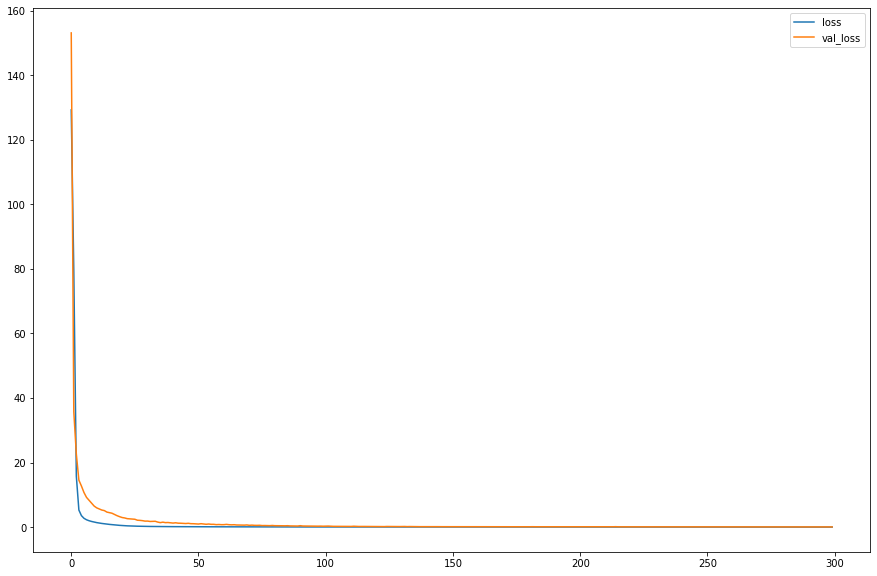

In [ ]:
pd.DataFrame(model.history.history).plot(figsize=(15,10))

## 7.Results

### 7.1 Polynomial Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly_tr, y_train_all)
predictions = lin_reg.predict(X_test_poly_tr)

print_reg_metrics(y_test, predictions, X_train_poly_tr.shape[1])

R2 score: 0.9997039548917767 
R2 Adjusted: 0.9996934500653558 
RMS Error: 0.11167133895360887 
MS Error: 0.012470487943691802 
MA Error: 0.08822997748856047


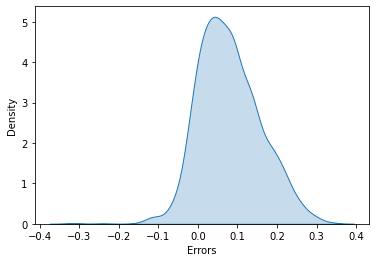

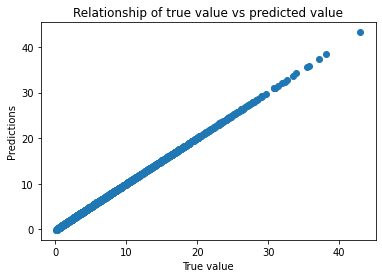

In [ ]:
#errors visualization
#can be helpful to better understand behavior of model

predictions = lin_reg.predict(X_test_poly_tr)
errors = y_test - predictions
errors_df = pd.DataFrame(list(errors), columns = ["Errors"]).set_index(pd.RangeIndex(start=1, stop=errors.shape[0]+1, step=1))

sns.kdeplot(data=errors_df, x="Errors", shade=True)
plt.show()

plt.scatter(y_test, predictions);
plt.title('Relationship of true value vs predicted value')
plt.ylabel('Predictions');
plt.xlabel('True value');
plt.show();

### 7.2 NN Model

In [ ]:
predictions = model.predict_generator(X_test_tr)
print_reg_metrics(y_test, predictions, X_train_tr.shape[1])

R2 score: 0.9937796769439857 
R2 Adjusted: 0.9937518704037264 
RMS Error: 0.5118812821243783 
MS Error: 0.2620224469892974 
MA Error: 0.3818420468859401


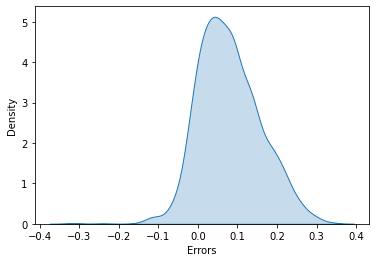

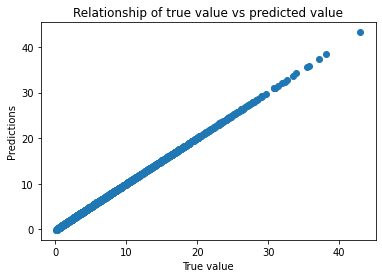

In [ ]:
#errors visualization
#can be helpful to better understand behavior of model

predictions = lin_reg.predict(X_test_poly_tr)
errors = y_test - predictions
errors_df = pd.DataFrame(list(errors), columns = ["Errors"]).set_index(pd.RangeIndex(start=1, stop=errors.shape[0]+1, step=1))

sns.kdeplot(data=errors_df, x="Errors", shade=True)
plt.show()

plt.scatter(y_test, predictions);
plt.title('Relationship of true value vs predicted value')
plt.ylabel('Predictions');
plt.xlabel('True value');
plt.show();

We can see that the NN model with 2 layers was able to achieve a very similar result to the one I got with polynomial regression. The results in both cases are quite high getting up to 0.99 R squared value. I belive the NN model is easier to construct and that would be its main advantage specifcally if we did not know what relationships to expect between the features and the target value.

# Classification task

In [ ]:
#@title Function for Confusion Matrix Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

## 1.Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW11/data/dataset_57_hypothyroid.csv"
data_clf = pd.read_csv(path, sep=",")
data_clf.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


We can see that the missing values are tagged as "?" question marks, so I will replace them with NaN values.

In [ ]:
data_clf = data_clf.replace("?", np.NaN)

In [ ]:
data_clf.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,NaN,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,NaN,f,NaN,f,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,NaN,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,NaN,f,NaN,f,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,NaN,SVI,negative


### 1.1 Data Preparation and Cleaning

In [ ]:
print("Shape:", data_clf.shape)
print("Column Types Count:\n", data_clf.dtypes.value_counts())

Shape: (3772, 30)
Column Types Count:
 object     29
float64     1
dtype: int64


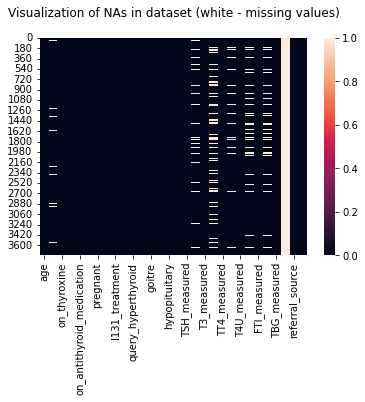

In [ ]:
sns.heatmap(data_clf.isna());
plt.title('Visualization of NAs in dataset (white - missing values)\n');

In [ ]:
total = data_clf.isnull().sum().sort_values(ascending=False)
percent = (data_clf.isnull().sum() / data_clf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                           Total   Percent
TBG                         3772  1.000000
T3                           769  0.203871
T4U                          387  0.102598
FTI                          385  0.102068
TSH                          369  0.097826
TT4                          231  0.061241
sex                          150  0.039767
age                            1  0.000265
referral_source                0  0.000000
TBG_measured                   0  0.000000
FTI_measured                   0  0.000000
T4U_measured                   0  0.000000
TT4_measured                   0  0.000000
T3_measured                    0  0.000000
TSH_measured                   0  0.000000
psych                          0  0.000000
hypopituitary                  0  0.000000
tumor                          0  0.000000
goitre                         0  0.000000
lithium                        0  0.000000
query_hyperthyroid             0  0.000000
query_hypothyroid              0  0.000000
I131_treatm

We can see that for the column TBG we actually have no data so will drop the column. For the other columns we will impute the data.

In [ ]:
if "TBG" in data_clf.columns:
  data_clf = data_clf.drop(["TBG"], axis=1)

I want to see all the columns.

In [ ]:
pd.set_option("display.max_columns", None)
data_clf.head(n=5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,NaN,f,NaN,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,NaN,f,NaN,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [ ]:
continious_features = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
categorical_features = list(data_clf.columns)
for col in continious_features:
  if col in categorical_features:
    categorical_features.remove(col)
if "Class" in categorical_features:
  categorical_features.remove("Class")
print("Continuous Features:", continious_features)
print("Categorical Features:", categorical_features)

Continuous Features: ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Features: ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']


I will change the type of continuous features to numerical.

In [ ]:
for column in continious_features:
  # if column == "age":
  #   data[column] = data[column].astype(dtype="int64", copy=True, errors="ignore")
  # else:
  data_clf[column] = pd.to_numeric(data_clf[column])

In [ ]:
print("Shape:", data_clf.shape)
print("Column Types Count:\n", data_clf.dtypes.value_counts())
print("Column Types:\n", data_clf.dtypes)

Shape: (3772, 29)
Column Types Count:
 object     23
float64     6
dtype: int64
Column Types:
 age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured     

### 1.2 Separation of Test from the Dataset

In [ ]:
y = data_clf["Class"]
X = data_clf.drop(["Class"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed+1,
                                                    test_size = 0.25,
                                                    shuffle=True, stratify=y)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

## 2.EDA and Transformation

In [ ]:
# training dataframe with target variable
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
descriptive_stats = df_train.describe(include='all')
descriptive_stats

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
count,2828.000000,2717,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2546.000000,2829,2251.000000,2829,2654.000000,2829,2545.000000,2829,2546.000000,2829,2829,2829
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,1,5,4
top,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,NaN,t,NaN,t,NaN,t,NaN,t,NaN,f,other,negative
freq,NaN,1864,2487,2794,2798,2720,2788,2788,2783,2653,2651,2816,2803,2751,2828,2682,2546,NaN,2251,NaN,2654,NaN,2545,NaN,2546,NaN,2829,1635,2611
mean,51.805163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.175183,NaN,2.001573,NaN,108.350301,NaN,0.993180,NaN,110.735585,NaN,NaN,NaN
std,18.839929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.901157,NaN,0.804745,NaN,35.749190,NaN,0.195603,NaN,33.320888,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005000,NaN,0.050000,NaN,2.900000,NaN,0.250000,NaN,2.800000,NaN,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,1.550000,NaN,88.000000,NaN,0.870000,NaN,93.000000,NaN,NaN,NaN
50%,54.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,NaN,2.000000,NaN,104.000000,NaN,0.970000,NaN,107.000000,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,2.300000,NaN,124.000000,NaN,1.080000,NaN,125.000000,NaN,NaN,NaN


We can observe here that the column TBG_measured has 1 unique value, thus it will have 0 predictive power and I will drop that column as well.

In [ ]:
if "TBG_measured" in data_clf.columns:
  df_train = df_train.drop(["TBG_measured"], axis=1)
  categorical_features.remove("TBG_measured")
  X_test = X_test.drop(["TBG_measured"], axis=1)

We can also see that the target variable Class has 4 unique values, meaning that we are going to solve the problem for multiclass classification.

### 2.1 Target Value Analysis

In [ ]:
y_train.value_counts()

negative                   2611
compensated_hypothyroid     145
primary_hypothyroid          71
secondary_hypothyroid         2
Name: Class, dtype: int64

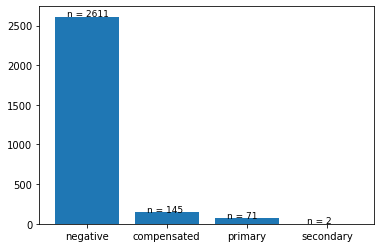

In [ ]:
height = [2611, 145, 71, 2]
bars = ["negative", "compensated", "primary", "secondary"]
y_pos = np.arange(len(bars))
label = ['n = 2611', 'n = 145', 'n = 71', 'n = 2']

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
for i in range(len(bars)):
    plt.text(x = y_pos[i]-0.25 , y = height[i]+1, s = label[i], size = 9)

plt.show()

We can see that our target value is imbalanced.

### 2.2 Categorical encoding and imputation of missing values

In [ ]:
class RareLabelEncoder(BaseEstimator, TransformerMixin):
    """
    Find infrequent category levels and encode them to one value
    """

    def __init__(self, tol=0.05, n_categories=5, replace_with='Rare'):
        self.tol = tol
        self.replace_with = replace_with
        self.n_categories = n_categories

    def fit(self, X):
        self.cols = X.columns
        self.encoder_dict = {}

        for c in self.cols:
            if X[c].nunique() > self.n_categories:
                t = pd.Series(X[c].value_counts() / np.float(len(X)))
                freq_idx = t[t >= self.tol].index
                self.encoder_dict[c] = freq_idx

        return self


    def transform(self, X):
        for feature in self.cols:
            if feature in self.encoder_dict.keys():
                X[feature] = np.where(
                    X[feature].isin(self.encoder_dict[feature]),
                    X[feature],
                    self.replace_with,
                )
        return X

In [ ]:
set_config(transform_output="pandas")
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
     # using minmax scaler to have all the data in the range (0,1)
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('rare_label_enc', RareLabelEncoder()),
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(drop='if_binary', sparse=False)),
    # to filter data that has very little variance thus will have little use in the models
    ('variance_trsh', VarianceThreshold(threshold=.97 * (1 - .97)))
])

pipe = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical_features),
    ('num', num_pipe, continious_features),

], verbose_feature_names_out=False)

In [ ]:
y_train = df_train["Class"]
X_train = df_train.drop(["Class"], axis=1)

In [ ]:
X_train_tr = pipe.fit_transform(X_train)
X_test_tr = pipe.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tr).describe(include='all')

,sex_F,sex_M,sex_unknown,on_thyroxine_t,sick_t,query_hypothyroid_t,query_hyperthyroid_t,psych_t,TSH_measured_t,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,referral_source_STMW,referral_source_SVHC,referral_source_SVI,referral_source_other,age,TSH,T3,TT4,T4U,FTI
count,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000
mean,0.658890,0.301520,0.039590,0.120891,0.038530,0.062213,0.062920,0.051962,0.899965,0.795688,0.938141,0.899611,0.899965,0.032520,0.103570,0.275009,0.577943,0.546292,0.010816,0.230955,0.246898,0.359024,0.275205
std,0.474166,0.458999,0.195028,0.326058,0.192505,0.241584,0.242862,0.221989,0.300100,0.403270,0.240942,0.300571,0.300100,0.177409,0.304756,0.446598,0.493975,0.202544,0.049420,0.084948,0.081071,0.089624,0.080596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.376344,0.001245,0.195266,0.201592,0.304348,0.232534
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.569892,0.003337,0.230955,0.241395,0.359024,0.273330
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.709677,0.007730,0.254438,0.278857,0.396135,0.303927
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_tr.shape

(2829, 23)

In [ ]:
# y_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
#     ('ohe', OneHotEncoder(sparse=False))
# ])

In [ ]:
# y_train_tr = y_pipe.fit_transform(np.array(y_train).reshape(-1, 1))

## 3.Correlations

### 3.1 Continuous

<Axes: >

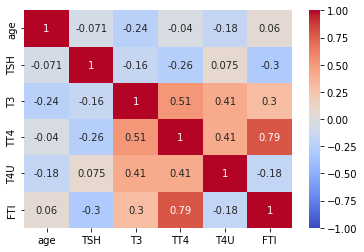

In [ ]:
corr = X_train_tr[continious_features].corr()
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)

Only "FTI" and "TT4" are strongly correlated, but still I will not drop any of the columns as it may still add some predictive power.

### 3.2 Categorical

In [ ]:
cat_var1 = list(X_train_tr.columns)
for cont in continious_features:
  if cont in cat_var1:
    cat_var1.remove(cont)
cat_var2 = cat_var1.copy()
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [ ]:
result = []
for i in cat_var_prod:
  if i[0] != i[1]: #and list(ss.chi2_contingency(pd.crosstab(X_train_tr[i[0]], X_train_tr[i[1]])))[1] > 0.05:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            X_train_tr[i[0]], X_train_tr[i[1]])))[1]))

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coeff"])

chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,FTI_measured_t,T3_measured_t,T4U_measured_t,TSH_measured_t,TT4_measured_t,on_thyroxine_t,psych_t,query_hyperthyroid_t,query_hypothyroid_t,referral_source_STMW,referral_source_SVHC,referral_source_SVI,referral_source_other,sex_F,sex_M,sex_unknown,sick_t
var1,,,,,,,,,,,,,,,,,
FTI_measured_t,NaN,5.239285e-49,0.000000e+00,2.871454e-170,0.000000e+00,9.402237e-02,3.962734e-03,4.869772e-01,0.584795,2.108419e-03,3.358506e-07,2.689933e-15,4.304079e-32,8.098050e-03,1.825636e-03,4.606214e-01,0.895397
T3_measured_t,5.239285e-49,NaN,1.175049e-48,2.874112e-121,3.572342e-111,4.445986e-13,2.544640e-07,1.308223e-01,0.000162,2.980423e-03,4.210324e-14,7.294912e-37,2.318971e-69,1.118823e-05,5.303440e-05,2.945787e-01,0.852004
T4U_measured_t,0.000000e+00,1.175049e-48,NaN,1.723247e-169,0.000000e+00,9.005103e-02,3.837152e-03,4.978828e-01,0.574353,2.061855e-03,3.130667e-07,6.671809e-15,1.273151e-31,1.056227e-02,2.551887e-03,4.690863e-01,0.885662
TSH_measured_t,2.871454e-170,2.874112e-121,1.723247e-169,NaN,3.843005e-282,9.402237e-02,1.929534e-04,2.547691e-03,0.018161,6.503388e-03,3.519248e-08,3.320154e-24,5.375001e-45,2.882871e-01,2.850125e-01,1.000000e+00,0.433865
TT4_measured_t,0.000000e+00,3.572342e-111,0.000000e+00,3.843005e-282,NaN,5.248898e-01,2.513510e-03,1.608045e-02,0.273752,2.236896e-02,2.060675e-05,2.434274e-14,1.851770e-26,2.584825e-04,1.732565e-05,3.033231e-01,0.758772
on_thyroxine_t,9.402237e-02,4.445986e-13,9.005103e-02,9.402237e-02,5.248898e-01,NaN,2.358983e-05,2.332760e-01,0.000001,8.397450e-01,1.259057e-07,7.191589e-21,2.066941e-31,6.170471e-06,7.593620e-06,7.584437e-01,0.009322
psych_t,3.962734e-03,2.544640e-07,3.837152e-03,1.929534e-04,2.513510e-03,2.358983e-05,NaN,2.271596e-03,0.563939,4.093382e-02,7.079318e-214,1.225531e-10,1.560188e-34,4.045881e-07,7.223607e-08,8.895340e-01,0.163788
query_hyperthyroid_t,4.869772e-01,1.308223e-01,4.978828e-01,2.547691e-03,1.608045e-02,2.332760e-01,2.271596e-03,NaN,0.891349,3.393479e-03,3.983374e-04,2.234918e-05,3.138530e-07,5.295977e-04,3.544061e-04,1.000000e+00,0.079555
query_hypothyroid_t,5.847950e-01,1.616739e-04,5.743529e-01,1.816055e-02,2.737522e-01,1.374758e-06,5.639388e-01,8.913487e-01,NaN,4.356605e-01,6.132326e-03,4.964245e-01,6.332732e-02,2.626145e-02,4.976378e-02,5.579211e-01,0.132597


These are the p-values of the Chi-test performed in between the categorical variables. The values less than 0.05 reject the null hypothesis that the variables are independent and there may be correlation between the 2 categorical variables. I still will not drop any of the columns as we do not have an overwhelming quantity of features.

## 4.SMOTE

I will generate some new data for the classes that had vary few data points.

In [ ]:
strategy = {"negative":2611, "compensated_hypothyroid":145, "primary_hypothyroid":71, "secondary_hypothyroid":36}
sm = SMOTE(k_neighbors=1, sampling_strategy=strategy, random_state=seed)
X_res, y_res = sm.fit_resample(X_train_tr, y_train)

I decided to add as little as possible synthetic data, not to diverge from original distribution, just to make sure that there is enough data in each k-fold for learning and testing.

In [ ]:
y_res.value_counts()

negative                   2611
compensated_hypothyroid     145
primary_hypothyroid          71
secondary_hypothyroid        36
Name: Class, dtype: int64

## 5.NN Model

In [ ]:
y_res_enc = pd.get_dummies(y_res)
y_res_enc

,compensated_hypothyroid,negative,primary_hypothyroid,secondary_hypothyroid
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2858,0,0,0,1
2859,0,0,0,1
2860,0,0,0,1
2861,0,0,0,1


In [ ]:
X_res_train, X_res_valid, y_res_train, y_res_valid = train_test_split(X_res, y_res_enc, random_state=seed,
                                                    test_size = 0.2,
                                                    shuffle=True, stratify=y_res_enc)

In [ ]:
model=Sequential() #here we get an insance of our model
model.add(Dense(46, activation="relu"))
#model.add(Dense(92, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['categorical_accuracy'])

In [ ]:
earlystop = EarlyStopping(patience=10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.0001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
history = model.fit(x= X_res_train, y= y_res_train, batch_size=256, epochs=300, validation_data=(X_res_valid, y_res_valid), callbacks = callbacks)

Epoch 1/300
9/9 [==============================] - 1s 46ms/step - loss: 1.3969 - categorical_accuracy: 0.1127 - val_loss: 1.2337 - val_categorical_accuracy: 0.5480 - lr: 0.0010
Epoch 2/300
9/9 [==============================] - 0s 10ms/step - loss: 1.1239 - categorical_accuracy: 0.8109 - val_loss: 0.9957 - val_categorical_accuracy: 0.9127 - lr: 0.0010
Epoch 3/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8939 - categorical_accuracy: 0.9118 - val_loss: 0.7743 - val_categorical_accuracy: 0.9127 - lr: 0.0010
Epoch 4/300
9/9 [==============================] - 0s 11ms/step - loss: 0.6886 - categorical_accuracy: 0.9118 - val_loss: 0.5866 - val_categorical_accuracy: 0.9127 - lr: 0.0010
Epoch 5/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5268 - categorical_accuracy: 0.9118 - val_loss: 0.4622 - val_categorical_accuracy: 0.9127 - lr: 0.0010
Epoch 6/300
9/9 [==============================] - 0s 9ms/step - loss: 0.4368 - categorical_accuracy: 0.9118 - val_

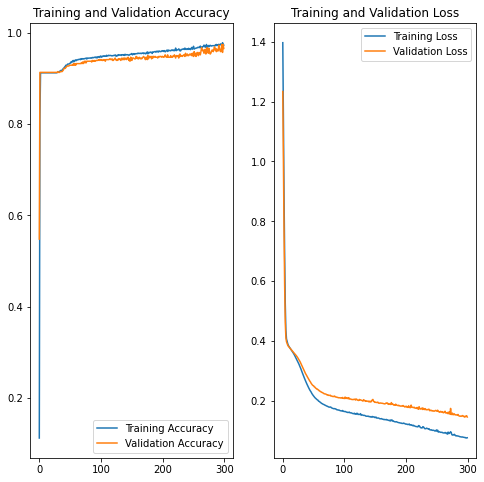

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Despite the values in the graphs seem to be different for the validation and training sets, they are quite close, but as we had good results since the beginning both graphs are zoomed in and show even the slightest differences. Thus, I do not think we have a case of overfitting here, the model performed very good.

## 6.Results

### 6.1 Decision Tree

This is the best model I found in the Classification homework. Here I will compare it with the NN model. To see which one of them performs better.

                         precision    recall  f1-score   support

compensated_hypothyroid       0.92      0.94      0.93        49
               negative       1.00      0.99      1.00       870
    primary_hypothyroid       0.96      0.92      0.94        24
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.99       943
              macro avg       0.72      0.71      0.72       943
           weighted avg       0.99      0.99      0.99       943

                                        Confusion Matrix


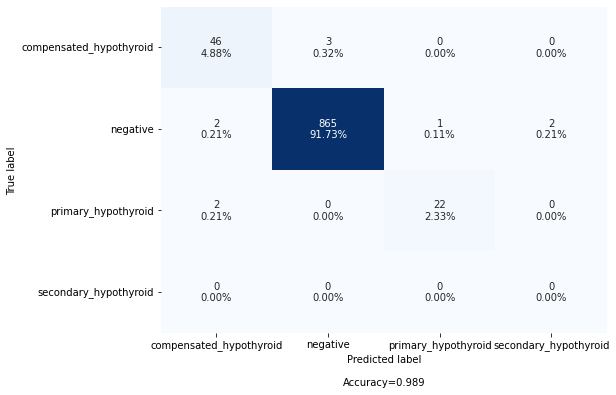

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=22)
clf.fit(X_res, y_res)
originalclass_lr = y_test
predictedclass_lr = clf.predict(X_test_tr)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["compensated_hypothyroid", "negative", "primary_hypothyroid", "secondary_hypothyroid"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

### 6.2 NN Classification

In [ ]:
predict = model.predict_generator(X_test_tr)

In [ ]:
def reverse_one_hot_encoder(predictions, number_of_classes = 4, column_names = ["compensated_hypothyroid", "negative", "primary_hypothyroid", "secondary_hypothyroid"]):
  preds = pd.DataFrame(predictions, columns = column_names)
  for col in column_names:
    preds[col] = preds[col].apply(lambda x: 0 if 1-x > x-0 else 1)
  for col in column_names:
    preds[col] = preds[col].apply(lambda x: col if x == 1 else "")
  preds["target"] = preds.sum(axis=1)
  preds["target"] = preds["target"].apply(lambda x: "negative" if x == "" else x)
  return preds["target"]

                         precision    recall  f1-score   support

compensated_hypothyroid       0.73      0.33      0.45        49
               negative       0.96      1.00      0.98       870
    primary_hypothyroid       0.94      0.71      0.81        24

               accuracy                           0.95       943
              macro avg       0.88      0.68      0.75       943
           weighted avg       0.95      0.95      0.95       943

                                        Confusion Matrix


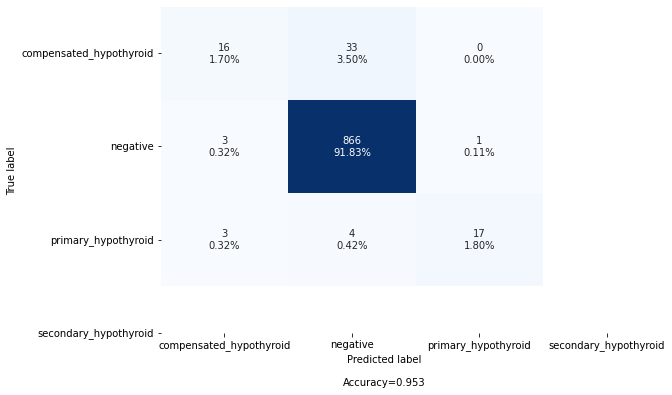

In [ ]:
originalclass_lr = y_test
predictedclass_lr = reverse_one_hot_encoder(predict)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["compensated_hypothyroid", "negative", "primary_hypothyroid", "secondary_hypothyroid"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

In this case we got a slightly worse result with the NN than what we had with the Decision Tree model. That may be very specific to this data as in this case we have a highly imbalanced data. However still the NN model is very compatiable and again it was faster to construct than the whole analisis to find that the decision tree was the best model. And in this case we may not pay attention to the macro average, it is low as one of the target classes was not represented in the test set.

# Computer Vision

## 1.Data Preparation

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path_train_hd = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW11/data/hotdog__not_hotdog/train/hot_dog"
path_train_nhd = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW11/data/hotdog__not_hotdog/train/not_hot_dog"
path_test_hd = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW11/data/hotdog__not_hotdog/test/hot_dog"
path_test_nhd = "/content/drive/MyDrive/EPAM_Data_Science/Homeworks/HW11/data/hotdog__not_hotdog/test/not_hot_dog"
paths = [path_train_hd, path_train_nhd, path_test_hd, path_test_nhd]
pathnames = []
categories = []
for i, path in enumerate(paths):
  filenames = os.listdir(path)
  for filename in filenames:
      pathnames.append(path+"/"+filename)
      if i%2 == 0:
          categories.append(1)
      else:
          categories.append(0)

df = pd.DataFrame({
    'pathname': pathnames,
    'target': categories
})

In [ ]:
df

,pathname,target
0,/content/drive/MyDrive/EPAM_Data_Science/Homew...,1
1,/content/drive/MyDrive/EPAM_Data_Science/Homew...,1
2,/content/drive/MyDrive/EPAM_Data_Science/Homew...,1
3,/content/drive/MyDrive/EPAM_Data_Science/Homew...,1
4,/content/drive/MyDrive/EPAM_Data_Science/Homew...,1
...,...,...
993,/content/drive/MyDrive/EPAM_Data_Science/Homew...,0
994,/content/drive/MyDrive/EPAM_Data_Science/Homew...,0
995,/content/drive/MyDrive/EPAM_Data_Science/Homew...,0
996,/content/drive/MyDrive/EPAM_Data_Science/Homew...,0


In [ ]:
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

<Axes: >

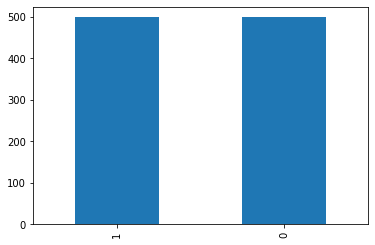

In [ ]:
df['target'].value_counts().plot.bar()

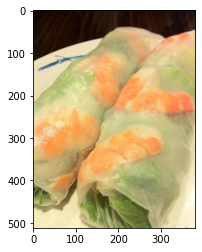

In [ ]:
sample = random.choice(df.pathname)
image = load_img(sample)
plt.imshow(image)

In [ ]:
df["target"] = df["target"].replace({0: 'Not-HotDog', 1: 'HotDog'})

In [ ]:
df_train = df[:-500]
df_test = df[-500:]
print(df_train.tail())
print(df_test.head())

                                              pathname      target
493  /content/drive/MyDrive/EPAM_Data_Science/Homew...  Not-HotDog
494  /content/drive/MyDrive/EPAM_Data_Science/Homew...  Not-HotDog
495  /content/drive/MyDrive/EPAM_Data_Science/Homew...  Not-HotDog
496  /content/drive/MyDrive/EPAM_Data_Science/Homew...  Not-HotDog
497  /content/drive/MyDrive/EPAM_Data_Science/Homew...  Not-HotDog
                                              pathname  target
498  /content/drive/MyDrive/EPAM_Data_Science/Homew...  HotDog
499  /content/drive/MyDrive/EPAM_Data_Science/Homew...  HotDog
500  /content/drive/MyDrive/EPAM_Data_Science/Homew...  HotDog
501  /content/drive/MyDrive/EPAM_Data_Science/Homew...  HotDog
502  /content/drive/MyDrive/EPAM_Data_Science/Homew...  HotDog


In [ ]:
# train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=123, stratify=df_train.target) # shuffle=True,
# train_df = train_df.reset_index(drop=True)
# validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df = df_train[50:-50]
validate_df = df_train.take(list(range(50))+list(range(-1, -51, -1)))
print(train_df.shape)
print(validate_df.shape)

(398, 2)
(100, 2)


In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=64

## 2.NN Base Model

### 2.1 Tunning the learing rate

Here we could also try to tune the number of neurons in different layers, but I will use it only to tune the learing rate.

In [ ]:
def model_builder(hp):
  model = Sequential()

  model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  # hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  # model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  # model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss="binary_crossentropy",
                metrics=['accuracy'])

  return model

In [ ]:
train_datagen = ImageDataGenerator(
)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 498 validated image filenames belonging to 2 classes.


In [ ]:
train_generator[0][1]

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.], dtype=float32)

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_generator[0][0], train_generator[0][1], epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.The optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 3 Complete [00h 00m 02s]
val_accuracy: 0.692307710647583

Best val_accuracy So Far: 0.692307710647583
Total elapsed time: 00h 00m 12s

The hyperparameter search is complete.The optimal learning rate for the optimizer
is 0.01.



### 2.2 Build Model

In [ ]:
# model = Sequential()

# model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) # 32 initializer = tf.keras.initializers.GlorotUniform()
# # model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))

# model.add(Conv2D(8, (3, 3), activation='relu')) # 64
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))

# # model.add(Conv2D(8, (3, 3), activation='relu')) # 128
# # model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu')) # 512
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["binary_accuracy"])

# model.summary()

In [ ]:
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["binary_accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)      

#### Callbacks

Here I will use a learing rate reduction in the model.

In [ ]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction, checkpoint]

#### Generator

In [ ]:
train_datagen = ImageDataGenerator(
    #rescale=1./255,
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 398 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator()#rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 100 validated image filenames belonging to 2 classes.


#### Fit

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size+1,
    steps_per_epoch=total_train//batch_size+1,
    callbacks=callbacks
)

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 11.1973 - binary_accuracy: 0.5201
Epoch 1: val_loss improved from inf to 2.11319, saving model to best_model.hdf5
7/7 [==============================] - 44s 6s/step - loss: 11.1973 - binary_accuracy: 0.5201 - val_loss: 2.1132 - val_binary_accuracy: 0.5400 - lr: 0.0010
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 3.1893 - binary_accuracy: 0.5151
Epoch 2: val_loss did not improve from 2.11319
7/7 [==============================] - 3s 386ms/step - loss: 3.1893 - binary_accuracy: 0.5151 - val_loss: 3.2868 - val_binary_accuracy: 0.5100 - lr: 0.0010
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 2.0218 - binary_accuracy: 0.5905
Epoch 3: val_loss did not improve from 2.11319
7/7 [==============================] - 3s 383ms/step - loss: 2.0218 - binary_accuracy: 0.5905 - val_loss: 2.1249 - val_binary_accuracy: 0.4700 - lr: 0.0010
Epoch 4/50
7/7 [==============================] - ETA: 0s - l

#### Visualize training

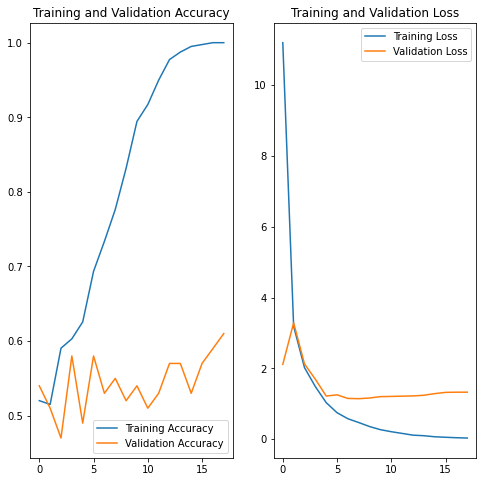

In [ ]:
acc = history.history["binary_accuracy"]
val_acc = history.history["val_binary_accuracy"]

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

I tried to make the model as simple as possible, however we can observe that it still overfits to the training set, and the results on validation set does even seem to change. I have tried more complicated models as well and they would overfit even faster.

### 2.3 Results on Test

In [ ]:
def reverse_one_hot_encoder(predictions, number_of_classes = 4, column_names = ["compensated_hypothyroid", "negative", "primary_hypothyroid", "secondary_hypothyroid"]):
  preds = pd.DataFrame(predictions, columns = column_names)
  preds["target"] = 0
  for col in column_names:
    preds["target"] = preds[col].apply(lambda x: 0 if 1-x > x-0 else 1)
  return preds["target"]

In [ ]:
test_datagen = ImageDataGenerator()#rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = model.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

         0.0       0.56      0.62      0.59       250
         1.0       0.58      0.52      0.55       250

    accuracy                           0.57       500
   macro avg       0.57      0.57      0.57       500
weighted avg       0.57      0.57      0.57       500

                                        Confusion Matrix


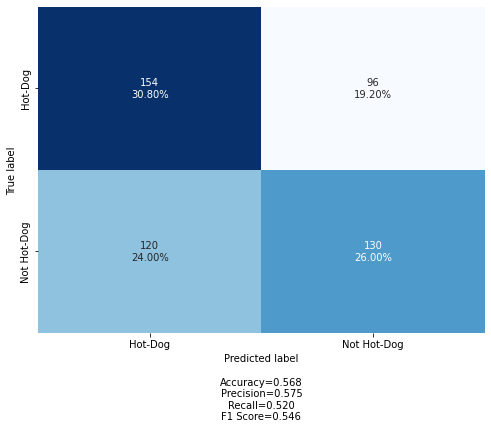

In [ ]:
originalclass_lr = test_generator[0][1]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

The results are very poor with the none pre-trained model. I tried different architectures and yet none of them was able to achieve better results. I think the problem is in the fact that we have very little amount of data.

## 3.NN with Augmentations

### 3.1 Augmentation

In [ ]:
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["binary_accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)      

#### Callbacks

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.001)

In [ ]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

In [ ]:
callbacks = [earlystop, learning_rate_reduction, checkpoint]

#### Generator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 398 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 100 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


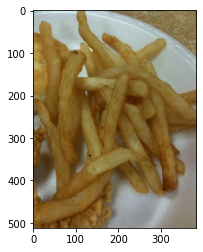

In [ ]:
image = load_img(example_df.pathname[0])
plt.imshow(image)

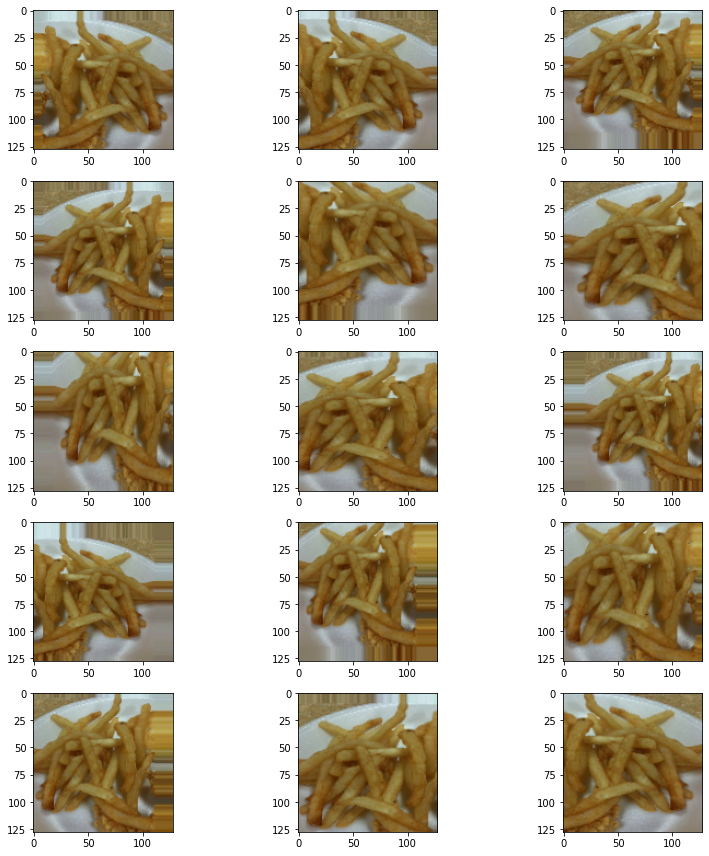

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#### Fit

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size+1,
    steps_per_epoch=total_train//batch_size+1,
    callbacks=callbacks
)

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 0.7300 - binary_accuracy: 0.5075
Epoch 1: val_loss improved from inf to 0.69616, saving model to best_model.hdf5
7/7 [==============================] - 6s 538ms/step - loss: 0.7300 - binary_accuracy: 0.5075 - val_loss: 0.6962 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 0.6942 - binary_accuracy: 0.5000
Epoch 2: val_loss improved from 0.69616 to 0.69087, saving model to best_model.hdf5
7/7 [==============================] - 4s 629ms/step - loss: 0.6942 - binary_accuracy: 0.5000 - val_loss: 0.6909 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 0.6908 - binary_accuracy: 0.5000
Epoch 3: val_loss improved from 0.69087 to 0.68847, saving model to best_model.hdf5
7/7 [==============================] - 5s 716ms/step - loss: 0.6908 - binary_accuracy: 0.5000 - val_loss: 0.6885 - val_binary_accuracy: 0.5000 

#### Visualize training

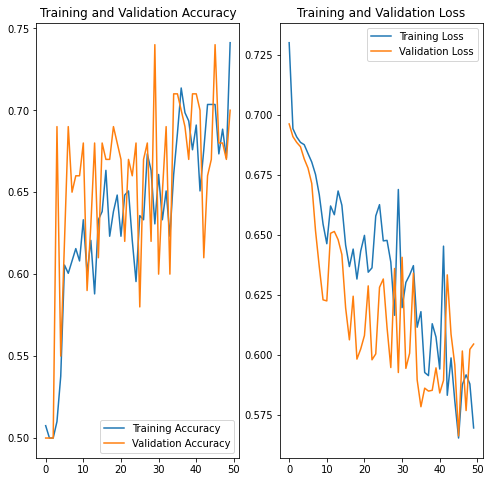

In [ ]:
acc = history.history["binary_accuracy"]
val_acc = history.history["val_binary_accuracy"]

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

#### Results on Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = model.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

         0.0       0.60      0.50      0.55       250
         1.0       0.57      0.67      0.62       250

    accuracy                           0.59       500
   macro avg       0.59      0.59      0.58       500
weighted avg       0.59      0.59      0.58       500

                                        Confusion Matrix


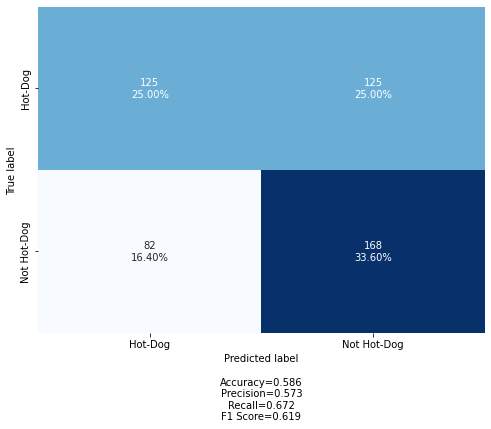

In [ ]:
originalclass_lr = test_generator[0][1]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

With augmentation we can observe that the results are not much better.

### 3.2 Augmentation with rotation and brightness

In [ ]:
model = Sequential()

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["binary_accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)      

#### Callbacks

In [ ]:
earlystop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.001)

In [ ]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

In [ ]:
callbacks = [earlystop, learning_rate_reduction, checkpoint]

#### Generator

In [ ]:
train_datagen = ImageDataGenerator(
    brightness_range=[0.3,1.0],
    rotation_range=20,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 398 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)#, horizontal_flip=True)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=batch_size
)

Found 100 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


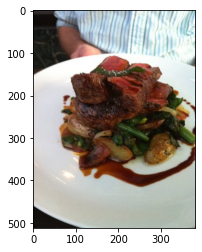

In [ ]:
image = load_img(example_df.pathname[0])
plt.imshow(image)

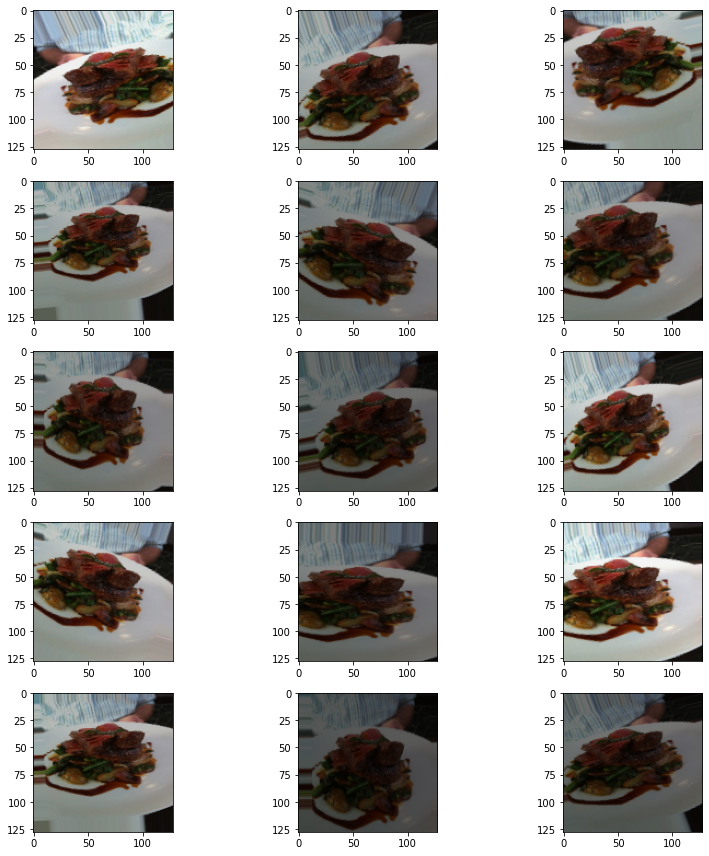

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#### Fit

In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size+1,
    steps_per_epoch=total_train//batch_size+1,
    callbacks=callbacks
)

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 0.7013 - binary_accuracy: 0.5126
Epoch 1: val_loss improved from inf to 0.69231, saving model to best_model.hdf5
7/7 [==============================] - 6s 578ms/step - loss: 0.7013 - binary_accuracy: 0.5126 - val_loss: 0.6923 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 0.6917 - binary_accuracy: 0.5025
Epoch 2: val_loss improved from 0.69231 to 0.68880, saving model to best_model.hdf5
7/7 [==============================] - 5s 819ms/step - loss: 0.6917 - binary_accuracy: 0.5025 - val_loss: 0.6888 - val_binary_accuracy: 0.5600 - lr: 0.0010
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 0.6911 - binary_accuracy: 0.5050
Epoch 3: val_loss did not improve from 0.68880
7/7 [==============================] - 4s 569ms/step - loss: 0.6911 - binary_accuracy: 0.5050 - val_loss: 0.6942 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
7/7 [========

#### Save parameters

In [ ]:
model.save_weights("model.h5")

#### Visualize training

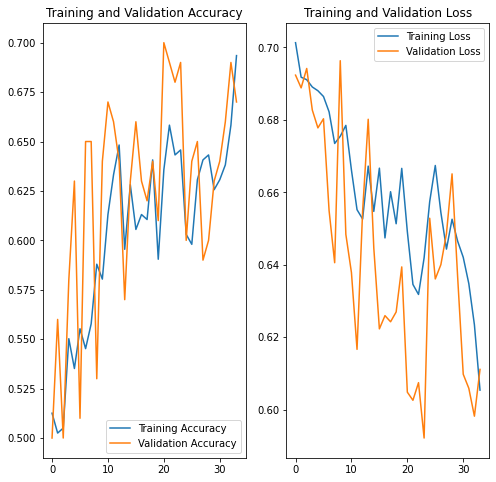

In [ ]:
acc = history.history["binary_accuracy"]
val_acc = history.history["val_binary_accuracy"]

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

#### Results on Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode="binary",
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = model.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

         0.0       0.57      0.67      0.61       250
         1.0       0.60      0.48      0.53       250

    accuracy                           0.58       500
   macro avg       0.58      0.58      0.57       500
weighted avg       0.58      0.58      0.57       500

                                        Confusion Matrix


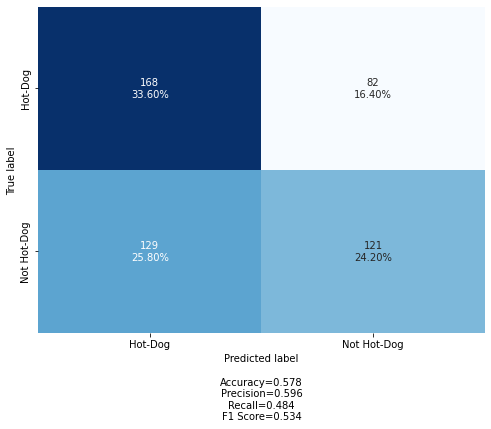

In [ ]:
originalclass_lr = test_generator[0][1]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

The Augmentation gave better results than the model without any augmentation. However the one without rotation and brightness changes gave more increase in the validation accuracy. Thus I would use the model with Augmentation but without rotation and brightness.

## 4.Pre-Trained Models

### 4.1 Generator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 398 validated image filenames belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_dataframe(
    validate_df,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 100 validated image filenames belonging to 2 classes.


### 4.2 VGG-16

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

#### Feature Extraction Approach

In [ ]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
optim_1 = Adam(learning_rate=0.001)
n_classes=2

n_steps = (total_train//batch_size) + 1
n_val_steps = (total_validate//batch_size) + 1
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

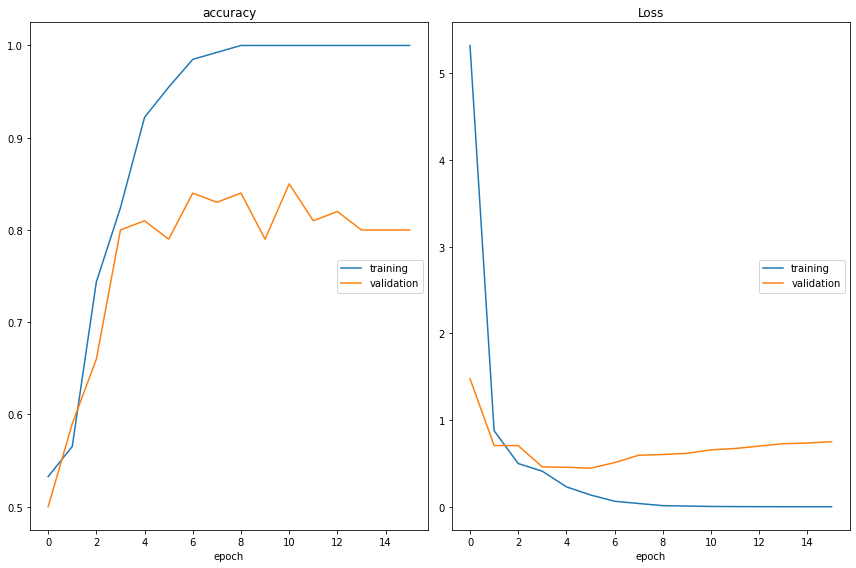

accuracy
	training         	 (min:    0.533, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    0.850, cur:    0.800)
Loss
	training         	 (min:    0.000, max:    5.322, cur:    0.000)
	validation       	 (min:    0.445, max:    1.478, cur:    0.751)
7/7 [==============================] - 127s 19s/step - loss: 4.3996e-04 - accuracy: 1.0000 - val_loss: 0.7507 - val_accuracy: 0.8000
CPU times: user 39min 59s, sys: 2min, total: 42min
Wall time: 32min


In [ ]:
%%time

vgg_history = vgg_model.fit(train_generator,
                            batch_size=batch_size,
                            epochs=n_epochs,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

#### Results on Test

In [ ]:
def reverse_one_hot_encoder(predictions, number_of_classes = 2, column_names = ["Hot-Dog", "Not Hot-Dog"]):
  preds = pd.DataFrame(predictions, columns = column_names)
  for col in column_names:
    preds[col] = preds[col].apply(lambda x: 0 if 1-x > x-0 else 1)
  for col in column_names:
    preds[col] = preds[col].apply(lambda x: col if x == 1 else "")
  preds["target"] = preds.sum(axis=1)
  preds["target"] = preds["target"].apply(lambda x: "Not Hot-Dog" if x == "" else x)
  return preds["target"]

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = vgg_model.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

     Hot-Dog       0.77      0.69      0.73       250
 Not Hot-Dog       0.72      0.79      0.75       250

    accuracy                           0.74       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.74      0.74      0.74       500

                                        Confusion Matrix


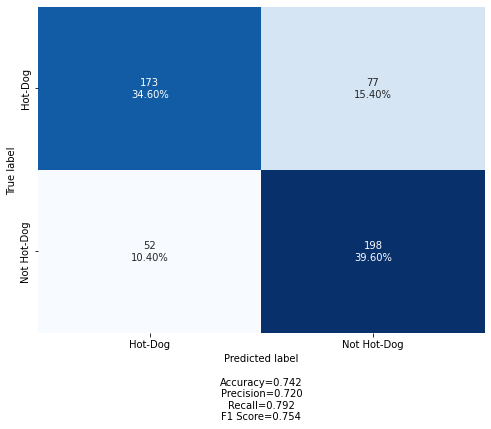

In [ ]:
originalclass_lr = reverse_one_hot_encoder(test_generator[0][1])
predictedclass_lr = reverse_one_hot_encoder(predict)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

#### Fine-Tuning Approach (Un-freezing pre-trained model layers)

In [ ]:
# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft = create_model(input_shape, n_classes, optim_2, fine_tune=2)

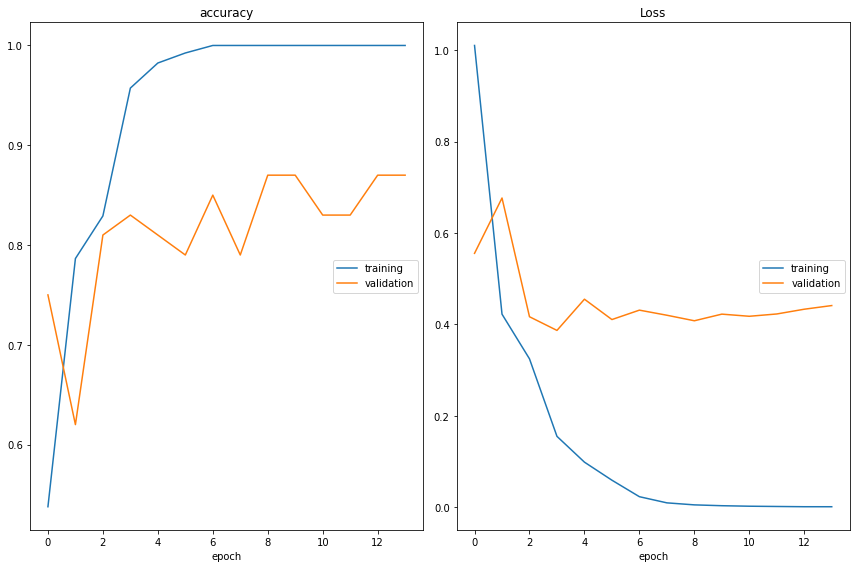

accuracy
	training         	 (min:    0.538, max:    1.000, cur:    1.000)
	validation       	 (min:    0.620, max:    0.870, cur:    0.870)
Loss
	training         	 (min:    0.001, max:    1.011, cur:    0.001)
	validation       	 (min:    0.387, max:    0.677, cur:    0.441)
7/7 [==============================] - 100s 15s/step - loss: 9.0532e-04 - accuracy: 1.0000 - val_loss: 0.4412 - val_accuracy: 0.8700
CPU times: user 36min 39s, sys: 1min 49s, total: 38min 29s
Wall time: 30min 32s


In [ ]:
%%time

plot_loss_2 = PlotLossesCallback()

# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft.fit(train_generator,
                                  batch_size=batch_size,
                                  epochs=n_epochs,
                                  validation_data=validation_generator,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

#### Results on Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = vgg_model_ft.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

     Hot-Dog       0.81      0.65      0.72       250
 Not Hot-Dog       0.71      0.85      0.77       250

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500

                                        Confusion Matrix


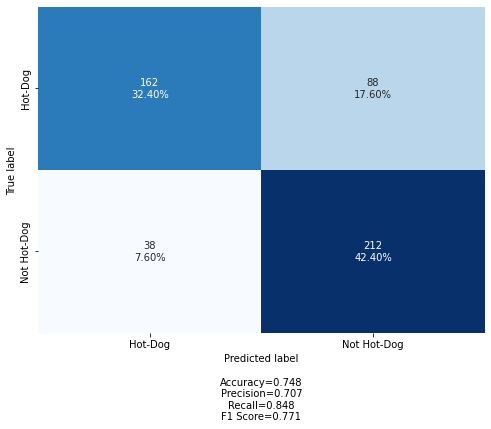

In [ ]:
originalclass_lr = reverse_one_hot_encoder(test_generator[0][1])
predictedclass_lr = reverse_one_hot_encoder(predict)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

### 4.3 ResNet50

In [ ]:
def create_model_resnet(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers

    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """

    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = ResNet50(include_top=False,
                     weights='imagenet',
                     input_shape=input_shape)

    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

#### Feature Extraction Approach

In [ ]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
optim_1 = Adam(learning_rate=0.001)
n_classes=2

n_steps = (total_train//batch_size) + 1
n_val_steps = (total_validate//batch_size) + 1
n_epochs = 50

# First we'll train the model without Fine-tuning
resnet_model = create_model_resnet(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

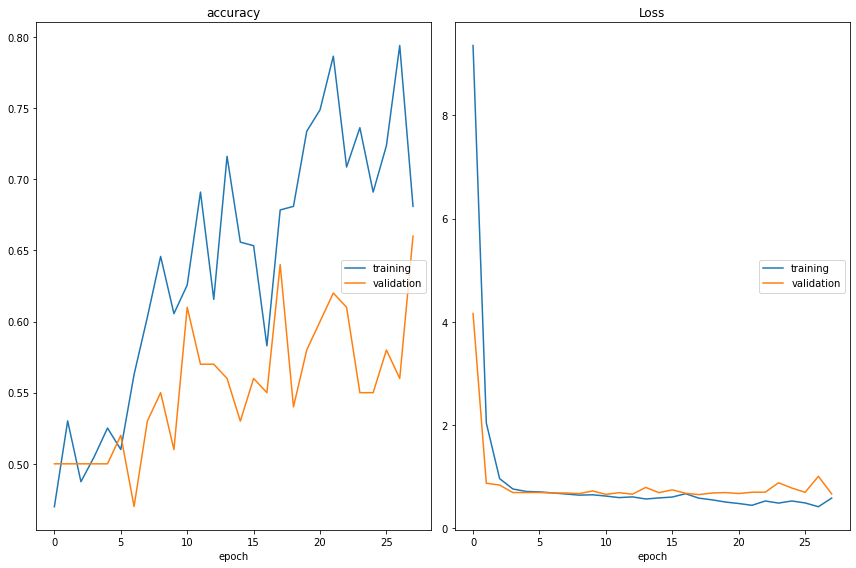

accuracy
	training         	 (min:    0.470, max:    0.794, cur:    0.681)
	validation       	 (min:    0.470, max:    0.660, cur:    0.660)
Loss
	training         	 (min:    0.417, max:    9.357, cur:    0.585)
	validation       	 (min:    0.652, max:    4.163, cur:    0.666)
7/7 [==============================] - 44s 7s/step - loss: 0.5852 - accuracy: 0.6809 - val_loss: 0.6656 - val_accuracy: 0.6600
CPU times: user 28min 13s, sys: 3min 56s, total: 32min 9s
Wall time: 30min 2s


In [ ]:
%%time

resnet_history = resnet_model.fit(train_generator,
                            batch_size=batch_size,
                            epochs=n_epochs,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

#### Results on Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = resnet_model.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

     Hot-Dog       0.60      0.58      0.59       250
 Not Hot-Dog       0.59      0.60      0.60       250

    accuracy                           0.59       500
   macro avg       0.59      0.59      0.59       500
weighted avg       0.59      0.59      0.59       500

                                        Confusion Matrix


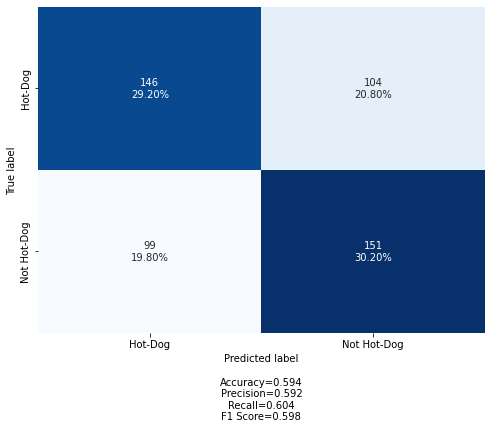

In [ ]:
originalclass_lr = reverse_one_hot_encoder(test_generator[0][1])
predictedclass_lr = reverse_one_hot_encoder(predict)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

#### Fine-Tuning Approach (Un-freezing pre-trained model layers)

In [ ]:
# Use a smaller learning rate
optim_2 = Adam(lr=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
resnet_model_ft = create_model_resnet(input_shape, n_classes, optim_2, fine_tune=2)

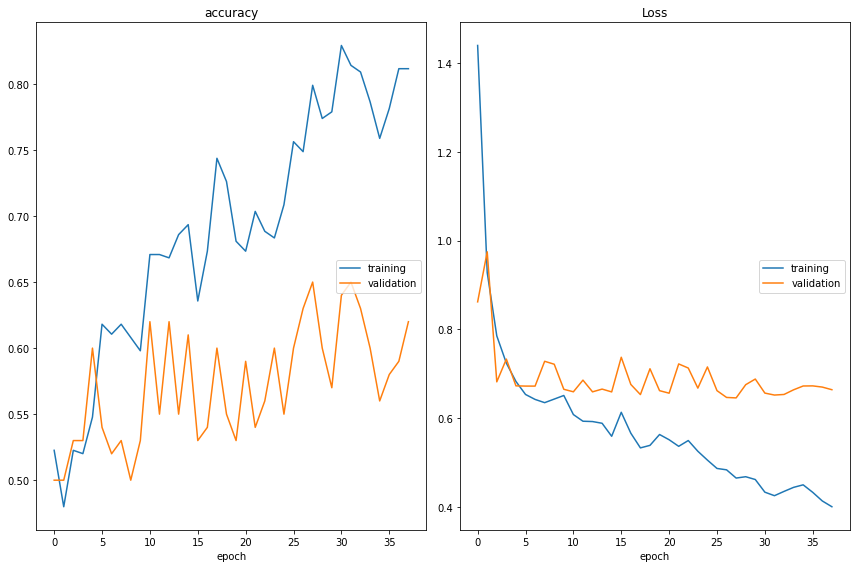

accuracy
	training         	 (min:    0.480, max:    0.829, cur:    0.812)
	validation       	 (min:    0.500, max:    0.650, cur:    0.620)
Loss
	training         	 (min:    0.400, max:    1.440, cur:    0.400)
	validation       	 (min:    0.645, max:    0.975, cur:    0.664)
7/7 [==============================] - 45s 7s/step - loss: 0.4001 - accuracy: 0.8116 - val_loss: 0.6639 - val_accuracy: 0.6200
CPU times: user 37min 35s, sys: 4min 35s, total: 42min 10s
Wall time: 44min 15s


In [ ]:
%%time

plot_loss_2 = PlotLossesCallback()

# Retrain model with fine-tuning
resnet_ft_history = resnet_model_ft.fit(train_generator,
                                  batch_size=batch_size,
                                  epochs=n_epochs,
                                  validation_data=validation_generator,
                                  steps_per_epoch=n_steps,
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_1, early_stop, plot_loss_2],
                                  verbose=1)

#### Results on Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="pathname",
    y_col="target",
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=500
)

Found 500 validated image filenames belonging to 2 classes.


In [ ]:
predict = resnet_model_ft.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

     Hot-Dog       0.59      0.70      0.64       250
 Not Hot-Dog       0.63      0.52      0.57       250

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.60       500
weighted avg       0.61      0.61      0.60       500

                                        Confusion Matrix


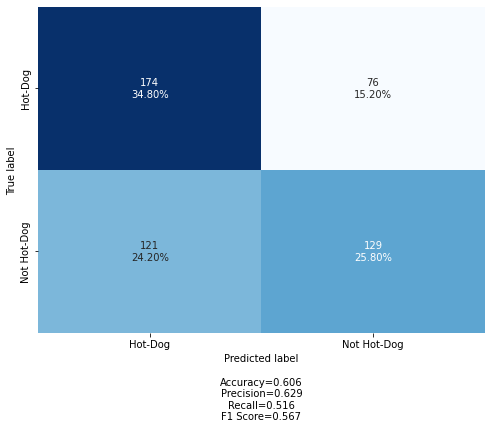

In [ ]:
originalclass_lr = reverse_one_hot_encoder(test_generator[0][1])
predictedclass_lr = reverse_one_hot_encoder(predict)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

## 5.Results

### 5.1 The Best Model

In [ ]:
predict = model.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

         0.0       0.60      0.50      0.55       250
         1.0       0.57      0.67      0.62       250

    accuracy                           0.59       500
   macro avg       0.59      0.59      0.58       500
weighted avg       0.59      0.59      0.58       500

                                        Confusion Matrix


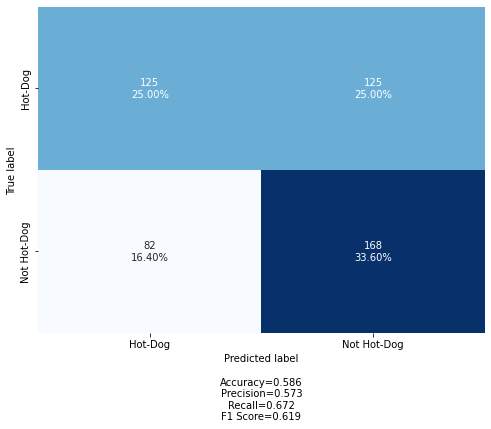

In [ ]:
originalclass_lr = test_generator[0][1]
predictedclass_lr = reverse_one_hot_encoder(predict, number_of_classes = 1, column_names = ["results"])
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

### 5.2 The Best Pre-Trained Model

In [ ]:
predict = vgg_model_ft.predict_generator(test_generator[0][0])

              precision    recall  f1-score   support

     Hot-Dog       0.81      0.65      0.72       250
 Not Hot-Dog       0.71      0.85      0.77       250

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500

                                        Confusion Matrix


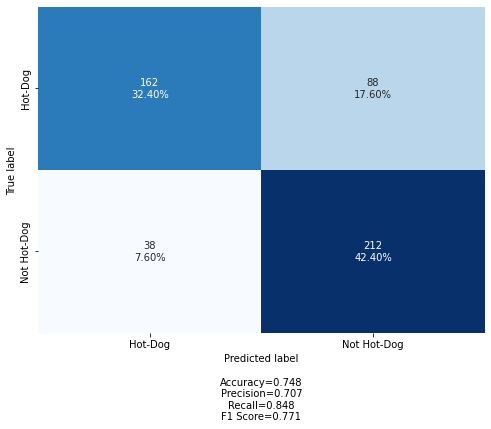

In [ ]:
originalclass_lr = reverse_one_hot_encoder(test_generator[0][1])
predictedclass_lr = reverse_one_hot_encoder(predict)
print(classification_report(originalclass_lr, predictedclass_lr))
print(40*" "+"Confusion Matrix")
cf_matrix = confusion_matrix(originalclass_lr, predictedclass_lr)
categories = ["Hot-Dog", "Not Hot-Dog"]
make_confusion_matrix(cf_matrix, categories=categories,  figsize=(8,6), cbar=False)

Both of the pre-trained models gave much better results than my models either with Augmentation or without. I belive the primary reason for that was the little amount of training data. Unfreezing the layers from the pre-trained models did not help much to achive higher predition power for the model. To sum up, I would choose VGG-16 model with feature extraction approach(using the feature of the pre trained model, keeping them frozen).  